In [1]:
import numpy as np
import matplotlib.pyplot as plt

def F(P, D, kdx):
    """
    Stability curve for centered scheme
    """
    return (1 - P * D * np.sin(kdx)) ** 2 - (2 * D * (1 - np.cos(kdx)))

def G(P, D, kdx):
    """
    Stability curve for upwind scheme
    """
    return (1 - P * D + P * D * np.cos(kdx) - 2 * D * (1 - np.cos(kdx))) ** 2 + (
        P * D * np.sin(kdx)
    ) ** 2

def quickplot(X, Y, Z):
    levels = [1]
    fig = plt.figure()
    plt.contour(X, Y, Z, levels=levels)
    plt.savefig("test.png")


0.4998572761161042
0.3213275150355087
0.23648855444862815
0.18708267732325673
0.15457506607542462
0.1315796602269666
0.11460188591307786
0.10207420959183865
0.09071320906164682
0.08288064896060818


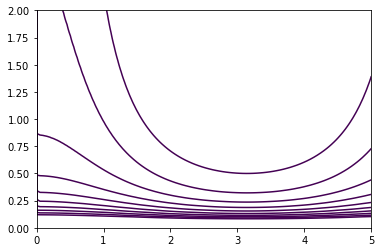

In [39]:
Ps = np.linspace(0, 10, 10)
Ds = np.linspace(0, 2, 100)
kdxs = np.linspace(0, 5, 100)

Dmg, kmg = np.meshgrid(Ds, kdxs)

contours = []
for i, P in enumerate(Ps):
    contours.append(G(P, Dmg, kmg))
    cs = plt.contour(kmg, Dmg, contours[i], levels=[1])
    print(cs.collections[0].get_paths()[0].vertices[:, 1].min())


In [30]:
p1 = cs.collections[0].get_paths()[0]  # grab the 1st path
coor_p1 = p1.vertices

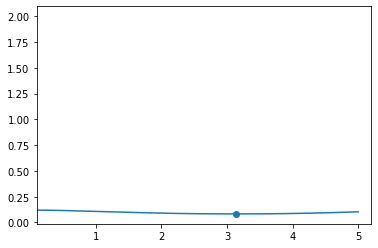

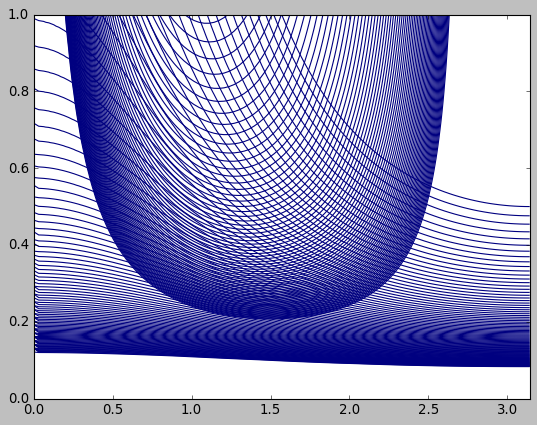

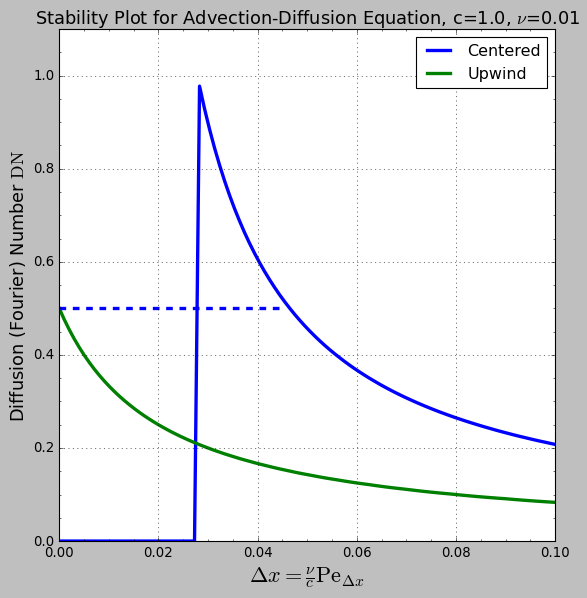

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def F(P, D, kdx):
    """
    Stability curve for centered scheme
    """
    return (1 - P * D * np.sin(kdx)) ** 2 - (2 * D * (1 - np.cos(kdx))) ** 2

def G(P, D, kdx):
    """
    Stability curve for upwind scheme
    """
    return (1 - P * D + P * D * np.cos(kdx) - 2 * D * (1 - np.cos(kdx))) ** 2 + (
        P * D * np.sin(kdx)
    ) ** 2

def stability_plot(Ps, fminvals, gminvals, c, v):
    plt.style.use("classic")
    fig = plt.figure(figsize=(8, 8))
    plt.plot(v / c * Ps, fminvals, linewidth=3, label="Centered")
    plt.plot(v / c * Ps, gminvals, linewidth=3, label="Upwind")
    plt.hlines(0.5, 0, 0.045, linewidth=3, colors="blue", linestyles="--")

    plt.xlabel(r"$\Delta x = \frac{\nu}{c} \mathrm{Pe}_{\Delta x}$", fontsize=20)
    plt.ylabel(r"Diffusion (Fourier) Number $\mathrm{DN}$", fontsize=16)
    plt.ylim(0, 0.6)

    plt.title(
        rf"Stability Plot for Advection-Diffusion Equation, c={c}, $\nu$={v}",
        fontsize=16,
    )

    plt.minorticks_on()
    plt.legend()
    plt.grid()
    plt.ylim(0, 1.1)

    plt.savefig(f"stability_plot_c{c}_v{v}.png", bbox_inches="tight", dpi=300)
    plt.show()


if __name__ == "__main__":

    c, v = 1.0, 0.01
    Ps = np.linspace(0, 10, 100)
    Ds = np.linspace(0, 1, 100)
    kdxs = np.linspace(0, np.pi, 100)

    Dmg, kmg = np.meshgrid(Ds, kdxs)

    fminvals = []
    gminvals = []

    with plt.ioff():
        for i, P in enumerate(Ps):
            F_values = F(P, Dmg, kmg)
            G_values = G(P, Dmg, kmg)

            fcs = plt.contour(kmg, Dmg, F_values, levels=[1])
            gcs = plt.contour(kmg, Dmg, G_values, levels=[1])

            # For the centered scheme
            if fcs.collections and fcs.collections[0].get_paths():
                fminvals.append(fcs.collections[0].get_paths()[0].vertices[:, 1].min())
            else:
                fminvals.append(0)

            # For the upwind scheme
            if gcs.collections and gcs.collections[0].get_paths():
                gminvals.append(gcs.collections[0].get_paths()[0].vertices[:, 1].min())
            else:
                gminvals.append(0)

    stability_plot(Ps, fminvals, gminvals, c, v)


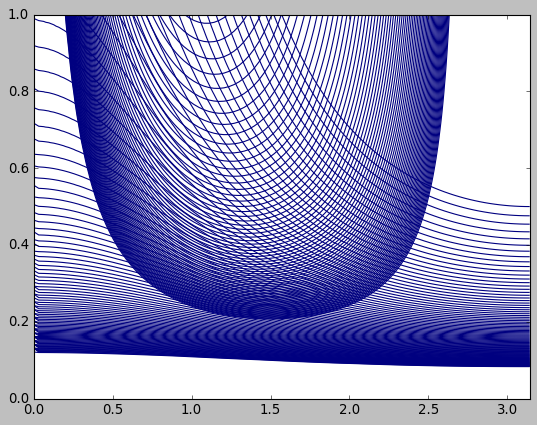

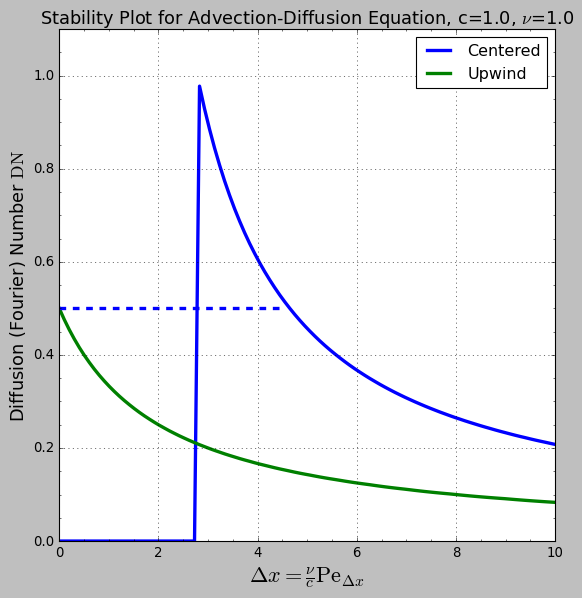

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def F(P, D, kdx):
    """
    Stability curve for centered scheme
    """
    return (1 - P * D * np.sin(kdx)) ** 2 - (2 * D * (1 - np.cos(kdx))) ** 2

def G(P, D, kdx):
    """
    Stability curve for upwind scheme
    """
    return (1 - P * D + P * D * np.cos(kdx) - 2 * D * (1 - np.cos(kdx))) ** 2 + (
        P * D * np.sin(kdx)
    ) ** 2

def stability_plot(Ps, fminvals, gminvals, c, v):
    plt.style.use("classic")
    fig = plt.figure(figsize=(8, 8))
    plt.plot(v / c * Ps, fminvals, linewidth=3, label="Centered")
    plt.plot(v / c * Ps, gminvals, linewidth=3, label="Upwind")
    plt.hlines(0.5, 0, 4.5, linewidth=3, colors="blue", linestyles="--")

    plt.xlabel(r"$\Delta x = \frac{\nu}{c} \mathrm{Pe}_{\Delta x}$", fontsize=20)
    plt.ylabel(r"Diffusion (Fourier) Number $\mathrm{DN}$", fontsize=16)
    plt.ylim(0, 0.6)

    plt.title(
        rf"Stability Plot for Advection-Diffusion Equation, c={c}, $\nu$={v}",
        fontsize=16,
    )

    plt.minorticks_on()
    plt.legend()
    plt.grid()
    plt.ylim(0, 1.1)

    plt.savefig(f"stability_plot_c{c}_v{v}.png", bbox_inches="tight", dpi=300)
    plt.show()


if __name__ == "__main__":

    c, v = 1.0, 1.0
    Ps = np.linspace(0, 10, 100)
    Ds = np.linspace(0, 1, 100)
    kdxs = np.linspace(0, np.pi, 100)

    Dmg, kmg = np.meshgrid(Ds, kdxs)

    fminvals = []
    gminvals = []

    with plt.ioff():
        for i, P in enumerate(Ps):
            F_values = F(P, Dmg, kmg)
            G_values = G(P, Dmg, kmg)

            fcs = plt.contour(kmg, Dmg, F_values, levels=[1])
            gcs = plt.contour(kmg, Dmg, G_values, levels=[1])

            # For the centered scheme
            if fcs.collections and fcs.collections[0].get_paths():
                fminvals.append(fcs.collections[0].get_paths()[0].vertices[:, 1].min())
            else:
                fminvals.append(0)

            # For the upwind scheme
            if gcs.collections and gcs.collections[0].get_paths():
                gminvals.append(gcs.collections[0].get_paths()[0].vertices[:, 1].min())
            else:
                gminvals.append(0)

    stability_plot(Ps, fminvals, gminvals, c, v)
